## Preparation of data:


In [1]:
#!pip install -r requirements.txt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
# NLTK

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from bs4 import BeautifulSoup

# import sys
# !{sys.executable} -m pip install wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sruthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sruthi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sruthi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
questions = pd.read_csv('../data/Questions.csv', encoding = "ISO-8859-1")
answers = pd.read_csv('../data/Answers.csv', encoding = "ISO-8859-1")
tags = pd.read_csv('../data/Tags.csv', encoding = "ISO-8859-1")

X_test_t = pd.read_csv('../data/X_test.csv', encoding = "ISO-8859-1")
y_test_t = pd.read_csv('../data/y_test.csv', encoding = "ISO-8859-1")

In [3]:
print(questions.shape)
questions.head()

(1264216, 7)


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [4]:
print(answers.shape)
answers.head() 

(2014516, 6)


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [5]:
grouped_answers = answers.groupby('ParentId')['Body'].apply(list)  # TODO : if we are filtering the answers based on score
print(grouped_answers.shape)
grouped_answers.head()

(1102568,)


ParentId
80     [<p>I wound up using this. It is a kind of a h...
90     [<p><a href="http://svnbook.red-bean.com/">Ver...
120    [<p>The Jeff Prosise version from MSDN magazin...
180    [<p>I've read somewhere the human eye can't di...
260    [<p>Yes, I thought about that, but I soon figu...
Name: Body, dtype: object

In [6]:
print(tags.shape)
tags.head()

(3750994, 2)


,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


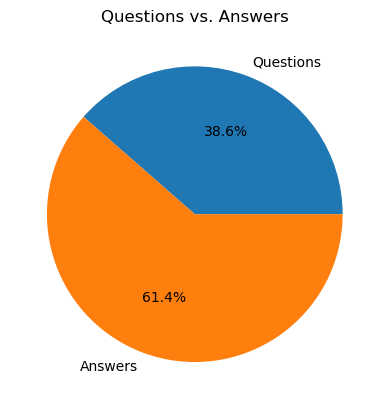

In [7]:
# Get the number of questions and answers
num_questions = questions.shape[0]
num_answers = answers.shape[0]

# Create a list with the number of questions and answers
sizes = [num_questions, num_answers]

# Create a list with the labels for the pie chart
labels = ['Questions', 'Answers']

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Questions vs. Answers')

# Display the pie chart
plt.show()

In [8]:
questions_and_answers = questions.merge(grouped_answers, left_on=['Id'], right_on = ['ParentId'], how='left')

In [9]:
questions_and_answers.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body_x,Body_y
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,[<p>I wound up using this. It is a kind of a h...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[<p><a href=""http://svnbook.red-bean.com/"">Ver..."
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,[<p>The Jeff Prosise version from MSDN magazin...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[<p>I've read somewhere the human eye can't di...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[<p>Yes, I thought about that, but I soon figu..."


In [10]:
questions_and_answers = questions_and_answers.rename(columns = {'Id_x': 'QID',
                           'CreationDate': 'QuestionCreationDate', 
                           'Score': 'QuestionScore', 
                           'Body_x': 'QuestionBody', 
                           'Body_y': 'AnswerBody'})
print(questions_and_answers.shape)
questions_and_answers.head()

(1264216, 8)


,Id,OwnerUserId,QuestionCreationDate,ClosedDate,QuestionScore,Title,QuestionBody,AnswerBody
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,[<p>I wound up using this. It is a kind of a h...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[<p><a href=""http://svnbook.red-bean.com/"">Ver..."
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,[<p>The Jeff Prosise version from MSDN magazin...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[<p>I've read somewhere the human eye can't di...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[<p>Yes, I thought about that, but I soon figu..."


In [11]:
grouped_tags = tags.groupby('Id')['Tag'].apply(list)
print(grouped_tags.head())

Id
80                           [flex, actionscript-3, air]
90     [svn, tortoisesvn, branch, branching-and-merging]
120                              [sql, asp.net, sitemap]
180    [algorithm, language-agnostic, colors, color-s...
260         [c#, .net, scripting, compiler-construction]
Name: Tag, dtype: object


In [12]:
dataset_with_tags = questions_and_answers.merge(grouped_tags, left_on=['Id'], right_on=['Id'], how='inner')
print(dataset_with_tags.shape)
dataset_with_tags.head()

(1264216, 9)


,Id,OwnerUserId,QuestionCreationDate,ClosedDate,QuestionScore,Title,QuestionBody,AnswerBody,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,[<p>I wound up using this. It is a kind of a h...,"[flex, actionscript-3, air]"
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[<p><a href=""http://svnbook.red-bean.com/"">Ver...","[svn, tortoisesvn, branch, branching-and-merging]"
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,[<p>The Jeff Prosise version from MSDN magazin...,"[sql, asp.net, sitemap]"
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[<p>I've read somewhere the human eye can't di...,"[algorithm, language-agnostic, colors, color-s..."
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[<p>Yes, I thought about that, but I soon figu...","[c#, .net, scripting, compiler-construction]"


In [13]:
data = dataset_with_tags.copy(deep=True)
rows = data.shape[0]
cols = data.shape[1]
print(f"Rows: {rows} and Cols: {cols}")
print(f"Sample data: {data.head()}")

Rows: 1264216 and Cols: 9
Sample data:     Id  OwnerUserId  QuestionCreationDate            ClosedDate  \
0   80         26.0  2008-08-01T13:57:07Z                   NaN   
1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z   
2  120         83.0  2008-08-01T15:50:08Z                   NaN   
3  180    2089740.0  2008-08-01T18:42:19Z                   NaN   
4  260         91.0  2008-08-01T23:22:08Z                   NaN   

   QuestionScore                                              Title  \
0             26  SQLStatement.execute() - multiple queries in o...   
1            144  Good branching and merging tutorials for Torto...   
2             21                                  ASP.NET Site Maps   
3             53                 Function for creating color wheels   
4             49  Adding scripting functionality to .NET applica...   

                                        QuestionBody  \
0  <p>I've written a database generation script i...   
1  <p>Are there any

In [14]:
print("Total no of questions:",data["Id"].nunique())

Total no of questions: 1264216


## Data Cleaning:

In [15]:
data = data.drop(columns=['Id', 'ClosedDate', 'QuestionCreationDate','OwnerUserId'])
data.head()

,QuestionScore,Title,QuestionBody,AnswerBody,Tag
0,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,[<p>I wound up using this. It is a kind of a h...,"[flex, actionscript-3, air]"
1,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[<p><a href=""http://svnbook.red-bean.com/"">Ver...","[svn, tortoisesvn, branch, branching-and-merging]"
2,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,[<p>The Jeff Prosise version from MSDN magazin...,"[sql, asp.net, sitemap]"
3,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[<p>I've read somewhere the human eye can't di...,"[algorithm, language-agnostic, colors, color-s..."
4,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[<p>Yes, I thought about that, but I soon figu...","[c#, .net, scripting, compiler-construction]"


In [16]:
data.isna().sum()

QuestionScore         0
Title                 0
QuestionBody          0
AnswerBody       161648
Tag                   0
dtype: int64

In [17]:
# convert Answers from list to str
mask = pd.Series([np.nan == lst for lst in data.AnswerBody])
mask = mask[mask == True]
mask = mask.index.values.tolist()

data['AnswerBody'] = data.AnswerBody.str.join(sep=' ')

In [18]:
data['QuestionBody'].iloc[mask]  = data['QuestionBody'].iloc[mask] + " " + data['AnswerBody'].iloc[mask]
data = data.rename(columns = {'QuestionBody': 'Body'})
data = data.drop(columns = ['AnswerBody'])
data.isna().sum()

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_57744/3502041033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['QuestionBody'].iloc[mask]  = data['QuestionBody'].iloc[mask] + " " + data['AnswerBody'].iloc[mask]


QuestionScore    0
Title            0
Body             0
Tag              0
dtype: int64

In [19]:
print(f"Minimum Score: {data['QuestionScore'].min()}")
print(f"Maximum Score: {data['QuestionScore'].max()}")

min_score = data['QuestionScore'].min()
max_score = data['QuestionScore'].max()

(data['QuestionScore'] >= 1).value_counts()

Minimum Score: -73
Maximum Score: 5190


False    670159
True     594057
Name: QuestionScore, dtype: int64

In [20]:
grouped_tags = tags.groupby(['Id', 'Tag']).size().groupby(level=1).sum().sort_values(ascending=False)
print("Count of each tag: ", grouped_tags)  # count of each tag

Count of each tag:  Tag
javascript    124155
java          115212
c#            101186
php            98808
android        90659
               ...  
tbcd               1
evil-dicom         1
evo                1
tbar               1
pjsua2             1
Length: 37034, dtype: int64


In [21]:
q = set()
for sublist in data['Tag'].values:
    q.update(sublist)
print("No of unique tags: ", len(q))

No of unique tags:  37035


In [22]:
actual_data = data.copy(deep=True)

all_tags_list = [item for row in data['Tag'] for item in row]
tags_counts = nltk.FreqDist(all_tags_list)
_50_most_common = tags_counts.most_common(50)
most_common_tags = [tag[0] for tag in _50_most_common]

# Get the frequency counts of the 50 most common tags
tag_freq = [tags_counts[tag] for tag in most_common_tags]
print(f"Taking 50 most common - {most_common_tags}")

Taking 50 most common - ['javascript', 'java', 'c#', 'php', 'android', 'jquery', 'python', 'html', 'c++', 'ios', 'mysql', 'css', 'sql', 'asp.net', 'objective-c', 'ruby-on-rails', '.net', 'c', 'iphone', 'angularjs', 'arrays', 'sql-server', 'json', 'ruby', 'r', 'ajax', 'regex', 'xml', 'node.js', 'asp.net-mvc', 'linux', 'django', 'wpf', 'database', 'swift', 'xcode', 'string', 'excel', 'vb.net', 'windows', 'spring', 'wordpress', 'eclipse', 'html5', 'multithreading', 'oracle', 'git', 'facebook', 'forms', 'bash']


In [23]:
# filtering the dataset with only the most common tags
def most_common(tags):
    tags_to_send = []
    for t in tags:
        if t in most_common_tags:
            tags_to_send.append(t)
    return tags_to_send


data['Tag'] = data['Tag'].apply(lambda x: most_common(x))
data['Tag'] = data['Tag'].apply(lambda x: x if len(x) > 0 else None)
data['QuestionScore'] = data['QuestionScore'].apply(lambda x: x if x >= 1 else None)
data.dropna(subset='Tag' , inplace=True)
data.dropna(subset='QuestionScore', inplace = True)

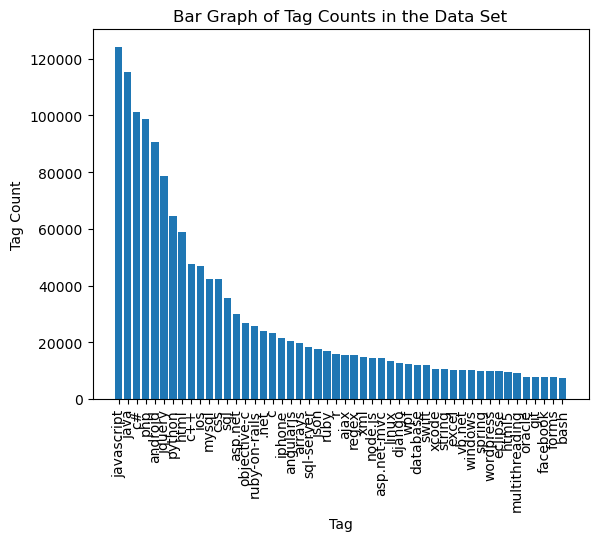

In [24]:
# Plot a bar graph of the tag frequency distribution
plt.bar(most_common_tags, tag_freq)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add axis labels and a title
plt.xlabel('Tag')
plt.ylabel('Tag Count')
plt.title('Bar Graph of Tag Counts in the Data Set')

# Show the plot
plt.show()

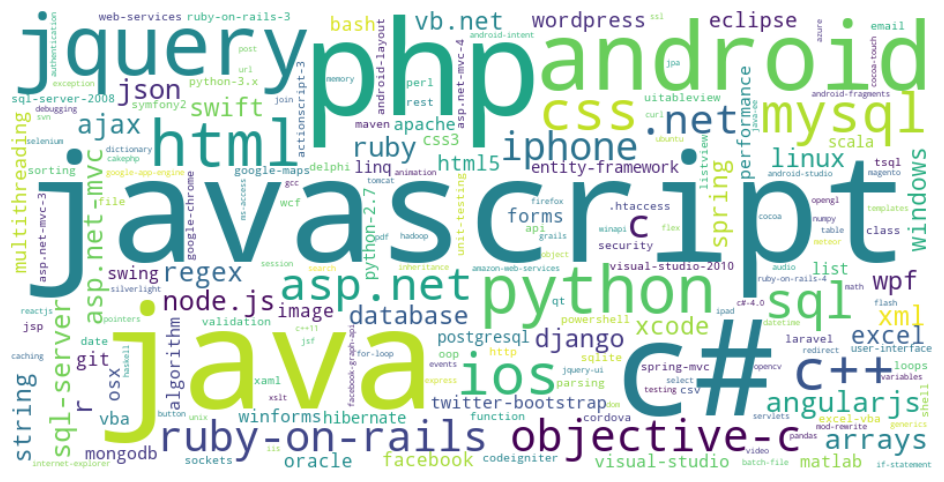

In [25]:
# Combine the tag names and their frequencies into a dictionary
tag_dict = dict(zip(most_common_tags, tag_freq))

# Create a word cloud from the tag dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(grouped_tags)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## DATA CLEANING AND PREPROCESSING: 

In [26]:
# Converting html to text in the body
data['Body'] = [BeautifulSoup(text).get_text() for text in data['Body'] ]
data['Title'] = [BeautifulSoup(text).get_text() for text in data['Title'] ]

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_57744/3523668634.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['Title'] = [BeautifulSoup(text).get_text() for text in data['Title'] ]
/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_57744/3523668634.py:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  data['Title'] = [BeautifulSoup(text).get_text() for text in data['Title'] ]


In [27]:
data.reset_index(inplace=True, drop=True)
data.head()

,QuestionScore,Title,Body,Tag
0,21.0,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...,"[sql, asp.net]"
1,49.0,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,"[c#, .net]"
2,29.0,Should I use nested classes in this case?,I am working on a collection of classes used f...,[c++]
3,13.0,Homegrown consumption of web services,I've been writing a few web services for a .ne...,[.net]
4,21.0,Deploying SQL Server Databases from Test to Live,I wonder how you guys manage deployment of a d...,[sql-server]


In [28]:
token = ToktokTokenizer()
punct = '!"$%&\'#()*+,./:;<=>?@[\\]^_`{|}~'
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = text.strip(' ')
    return text

def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

def clean_punct(text): 
    words = token.tokenize(text)
    tokens = [token for token in words if not re.match(re.compile('[%s]' % re.escape(punct)), token)]
    filtered_list = strip_list_noempty(tokens)
    return ' '.join(map(str, filtered_list))

def clean_numbers(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

def lemmatizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [29]:
new_df = data.copy(deep=True)

In [30]:
%%time
# Remove stopwords, punctuation and lemmatize for text in body
new_df['Body'] = new_df['Body'].apply(lambda x: clean_text(x)) 
new_df['Body'] = new_df['Body'].apply(lambda x: clean_punct(x)) 
new_df['Body'] = new_df['Body'].apply(lambda x: lemmatizeWords(x))
new_df['Body'] = new_df['Body'].apply(lambda x: clean_numbers(x))
new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x))

# Remove stopwords, punctuation and lemmatize for title.
new_df['Title'] = new_df['Title'].apply(lambda x: str(x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: clean_punct(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: lemmatizeWords(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: clean_numbers(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x))

CPU times: user 18min 47s, sys: 18.6 s, total: 19min 5s
Wall time: 19min 8s


In [31]:
merged_df = new_df.copy(deep=True)

In [32]:
merged_df.drop(columns=['QuestionScore'], inplace=True)
merged_df

,Title,Body,Tag
0,asp.net site map,anyone get experience create sql-based asp.net...,"[sql, asp.net]"
1,add script functionality applications,little game write c#. use database back-end. t...,"[c#, .net]"
2,use nest class case,work collection class use video playback recor...,[c++]
3,homegrown consumption web service,write web service app ready consume them. see ...,[.net]
4,deploy sql server databases test live,wonder guy manage deployment database sql serv...,[sql-server]
...,...,...,...
459845,c++ - assignment raw pointers unique_ptr nod l...,try figure update tail raw pointer new tail re...,[c++]
459846,tostring - miss localization option general ma...,problem use german windows installation theref...,"[c#, .net, string]"
459847,mvc remote validation render,model call itemcodemodel define outside mvc pr...,"[c#, asp.net-mvc]"
459848,execute multiline python code bash script,need extend shell script bash much familiar py...,"[python, bash]"


In [33]:
merged_df.isna().sum()

Title    0
Body     0
Tag      0
dtype: int64

In [34]:
merged_df.shape

(459850, 3)

In [35]:
merged_df['Combined_text'] = merged_df['Title'] + ' ' + merged_df['Body']

## EDA: 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from scipy. sparse import hstack

In [37]:
no_topics = 20

In [38]:
X1 = merged_df['Body']
X2 = merged_df['Title']
y = merged_df['Tag']
XC3 = merged_df['Combined_text']

In [39]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [40]:
X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)
XC3_tfidf = vectorizer_X1.fit_transform(XC3)

## LDA for Body

In [41]:
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(XC3_tfidf)

In [42]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")
        
no_top_words = 10
display_topics(lda, vectorizer_X1.get_feature_names_out(), no_top_words)

--------------------------------------------
Topic 0:
database sql mysql db server connection commit oracle player connect
--------------------------------------------
--------------------------------------------
Topic 1:
array string line value print number regex print( list python
--------------------------------------------
--------------------------------------------
Topic 2:
.. file error run project use command build -- version
--------------------------------------------
--------------------------------------------
Topic 3:
node require( fragment xml intent res vector tree csv root
--------------------------------------------
--------------------------------------------
Topic 4:
image color cell tableview dictionary label touch black product background
--------------------------------------------
--------------------------------------------
Topic 5:
public class object string new method type return private set
--------------------------------------------
------------------------

## Data Preparation


In [43]:
X_1 = merged_df['Body']
X_2 = merged_df['Title']
y_label = merged_df['Tag']
X_C3 = merged_df['Combined_text']

multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [44]:
X_C3_tfidf = vectorizer_X1.fit_transform(X_C3)
X_tfidf = hstack([X1_tfidf,X2_tfidf])

In [45]:
X_train_df = pd.DataFrame(X_tfidf.toarray())
y_train_df = pd.DataFrame(y_bin)

In [46]:
y_bin.shape

(459850, 50)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_C3_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

In [48]:
print("X train shape", X_train.shape)
print("y train shape", y_train.shape)
print("X test shape", X_test.shape)
print("y test shape", y_test.shape)

X train shape (367880, 1000)
y train shape (367880, 50)
X test shape (91970, 1000)
y test shape (91970, 50)


## Classification and Prediction

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer,hamming_loss,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier 
# from skmultilearn.problem_transform import BinaryRelevance

In [50]:
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Hamming loss: {}".format(hamming_loss(y_test, y_pred)))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1-score: {}".format(f1))
    print("---")  

In [133]:
%%time 

dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression(max_iter=1000) 
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Hamming loss: 0.02934652604110036
F1-score: 0.0
---
Clf:  SGDClassifier
Hamming loss: 0.017479830379471567
F1-score: 0.58719446189046
---
Clf:  LogisticRegression
Hamming loss: 0.016173317386104166
F1-score: 0.6569951107855252
---
Clf:  MultinomialNB
Hamming loss: 0.021752093073828423
F1-score: 0.5812207293660707
---
Clf:  LinearSVC
Hamming loss: 0.016065021202566053
F1-score: 0.6492907451514814
---
Clf:  Perceptron
Hamming loss: 0.024364901598347286
F1-score: 0.5829379693068012
---
Clf:  PassiveAggressiveClassifier
Hamming loss: 0.020365988909426987
F1-score: 0.6271369929995156
---
CPU times: user 6min 13s, sys: 4.9 s, total: 6min 18s
Wall time: 6min 19s


In [172]:
clf1 = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print_score(y_pred, LogisticRegression(max_iter=1000))

Clf:  LogisticRegression
Hamming loss: 0.017387191475481137
F1-score: 0.6216840746677114
---


In [ ]:
from sklearn.model_selection import GridSearchCV

clf = OneVsRestClassifier(LinearSVC())

params = {
    'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'estimator__multi_class': ['ovr', 'multinomial'],
    'estimator__class_weight': ['balanced', None]
}

params_svc = {
    'estimator__penalty': ['l1', 'l2'],
    'estimator__loss': ['hinge', 'squared_hinge'],
    'estimator__dual': [True, False],
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__class_weight': ['balanced', None],
    'estimator__max_iter': [1000, 5000]
}

grid = GridSearchCV(clf, params_svc, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best hyperparameters:", grid.best_params_)
print("Train score:", grid.best_score_)
print("Test score:", grid.score(X_test, y_test))

In [153]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
y_bin.shape

(459850, 50)

In [53]:
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB()
svm = LinearSVC(random_state=42, max_iter=1000)

for classifier in [lr, nb, svm, dt]:
    clf = OneVsRestClassifier(classifier, verbose=10, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   42.8s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   46.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.7s finished


Clf:  LogisticRegression
Hamming loss: 0.017385886702185497
F1-score: 0.6216995048785074
---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished


Clf:  MultinomialNB
Hamming loss: 0.02477829727084919
F1-score: 0.3342071817810095
---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   26.8s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   30.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.0s finished


Clf:  LinearSVC
Hamming loss: 0.017381972382298577
F1-score: 0.6080526531362093
---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 43.1min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 48.4min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 50.8min finished


Clf:  DecisionTreeClassifier
Hamming loss: 0.024821137327389366
F1-score: 0.5722301652487574
---


In [54]:
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB()
svm = LinearSVC(random_state=42, max_iter=1000)

for classifier in [lr, nb, svm, dt]:
    clf = ClassifierChain(classifier, verbose=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total=   5.6s
[Chain] .................. (2 of 50) Processing order 1, total=   5.6s
[Chain] .................. (3 of 50) Processing order 2, total=   6.9s
[Chain] .................. (4 of 50) Processing order 3, total=   5.3s
[Chain] .................. (5 of 50) Processing order 4, total=   4.7s
[Chain] .................. (6 of 50) Processing order 5, total=   6.6s
[Chain] .................. (7 of 50) Processing order 6, total=   6.4s
[Chain] .................. (8 of 50) Processing order 7, total=   5.3s
[Chain] .................. (9 of 50) Processing order 8, total=   6.7s
[Chain] ................. (10 of 50) Processing order 9, total=  10.8s
[Chain] ................ (11 of 50) Processing order 10, total=   7.6s
[Chain] ................ (12 of 50) Processing order 11, total=   6.2s
[Chain] ................ (13 of 50) Processing order 12, total=   5.9s
[Chain] ................ (14 of 50) Processing order 13, total=   3.3s
[Chain

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total=   0.2s
[Chain] .................. (2 of 50) Processing order 1, total=   0.1s
[Chain] .................. (3 of 50) Processing order 2, total=   0.1s
[Chain] .................. (4 of 50) Processing order 3, total=   0.1s
[Chain] .................. (5 of 50) Processing order 4, total=   0.1s
[Chain] .................. (6 of 50) Processing order 5, total=   0.1s
[Chain] .................. (7 of 50) Processing order 6, total=   0.1s
[Chain] .................. (8 of 50) Processing order 7, total=   0.1s
[Chain] .................. (9 of 50) Processing order 8, total=   0.1s
[Chain] ................. (10 of 50) Processing order 9, total=   0.1s
[Chain] ................ (11 of 50) Processing order 10, total=   0.1s
[Chain] ................ (12 of 50) Processing order 11, total=   0.1s
[Chain] ................ (13 of 50) Processing order 12, total=   0.1s
[Chain] ................ (14 of 50) Processing order 13, total=   0.1s
[Chain

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total=   5.3s
[Chain] .................. (2 of 50) Processing order 1, total=   3.2s
[Chain] .................. (3 of 50) Processing order 2, total=   4.1s
[Chain] .................. (4 of 50) Processing order 3, total=   3.2s
[Chain] .................. (5 of 50) Processing order 4, total=   4.2s
[Chain] .................. (6 of 50) Processing order 5, total=   5.8s
[Chain] .................. (7 of 50) Processing order 6, total=   3.6s
[Chain] .................. (8 of 50) Processing order 7, total=   1.9s
[Chain] .................. (9 of 50) Processing order 8, total=   3.1s
[Chain] ................. (10 of 50) Processing order 9, total=   8.3s
[Chain] ................ (11 of 50) Processing order 10, total=   4.4s
[Chain] ................ (12 of 50) Processing order 11, total=   3.8s
[Chain] ................ (13 of 50) Processing order 12, total=   5.0s
[Chain] ................ (14 of 50) Processing order 13, total=   2.2s
[Chain

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total= 7.1min
[Chain] .................. (2 of 50) Processing order 1, total= 3.1min
[Chain] .................. (3 of 50) Processing order 2, total= 8.4min
[Chain] .................. (4 of 50) Processing order 3, total= 6.8min
[Chain] .................. (5 of 50) Processing order 4, total= 6.9min
[Chain] .................. (6 of 50) Processing order 5, total= 8.9min
[Chain] .................. (7 of 50) Processing order 6, total= 4.9min
[Chain] .................. (8 of 50) Processing order 7, total= 5.8min
[Chain] .................. (9 of 50) Processing order 8, total= 7.3min
[Chain] ................. (10 of 50) Processing order 9, total= 6.1min
[Chain] ................ (11 of 50) Processing order 10, total= 5.5min
[Chain] ................ (12 of 50) Processing order 11, total= 6.1min
[Chain] ................ (13 of 50) Processing order 12, total= 4.3min
[Chain] ................ (14 of 50) Processing order 13, total= 4.4min
[Chain

In [55]:
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB()
svm = LinearSVC(random_state=42, max_iter=1000)

for classifier in [svm]:
    clf = ClassifierChain(classifier, verbose=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total=   5.4s
[Chain] .................. (2 of 50) Processing order 1, total=   3.4s
[Chain] .................. (3 of 50) Processing order 2, total=   4.0s
[Chain] .................. (4 of 50) Processing order 3, total=   3.2s
[Chain] .................. (5 of 50) Processing order 4, total=   4.0s
[Chain] .................. (6 of 50) Processing order 5, total=   5.6s
[Chain] .................. (7 of 50) Processing order 6, total=   3.8s
[Chain] .................. (8 of 50) Processing order 7, total=   1.9s
[Chain] .................. (9 of 50) Processing order 8, total=   3.2s
[Chain] ................. (10 of 50) Processing order 9, total=   9.2s
[Chain] ................ (11 of 50) Processing order 10, total=   5.0s
[Chain] ................ (12 of 50) Processing order 11, total=   3.8s
[Chain] ................ (13 of 50) Processing order 12, total=   5.5s
[Chain] ................ (14 of 50) Processing order 13, total=   2.3s
[Chain

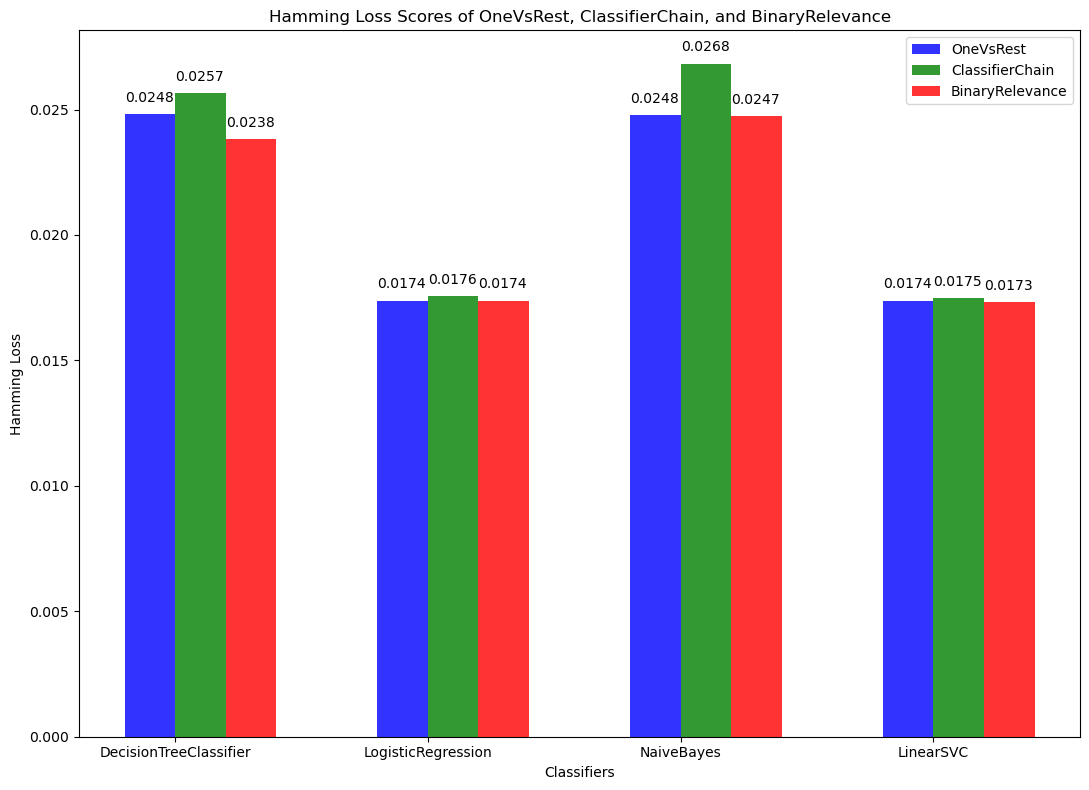

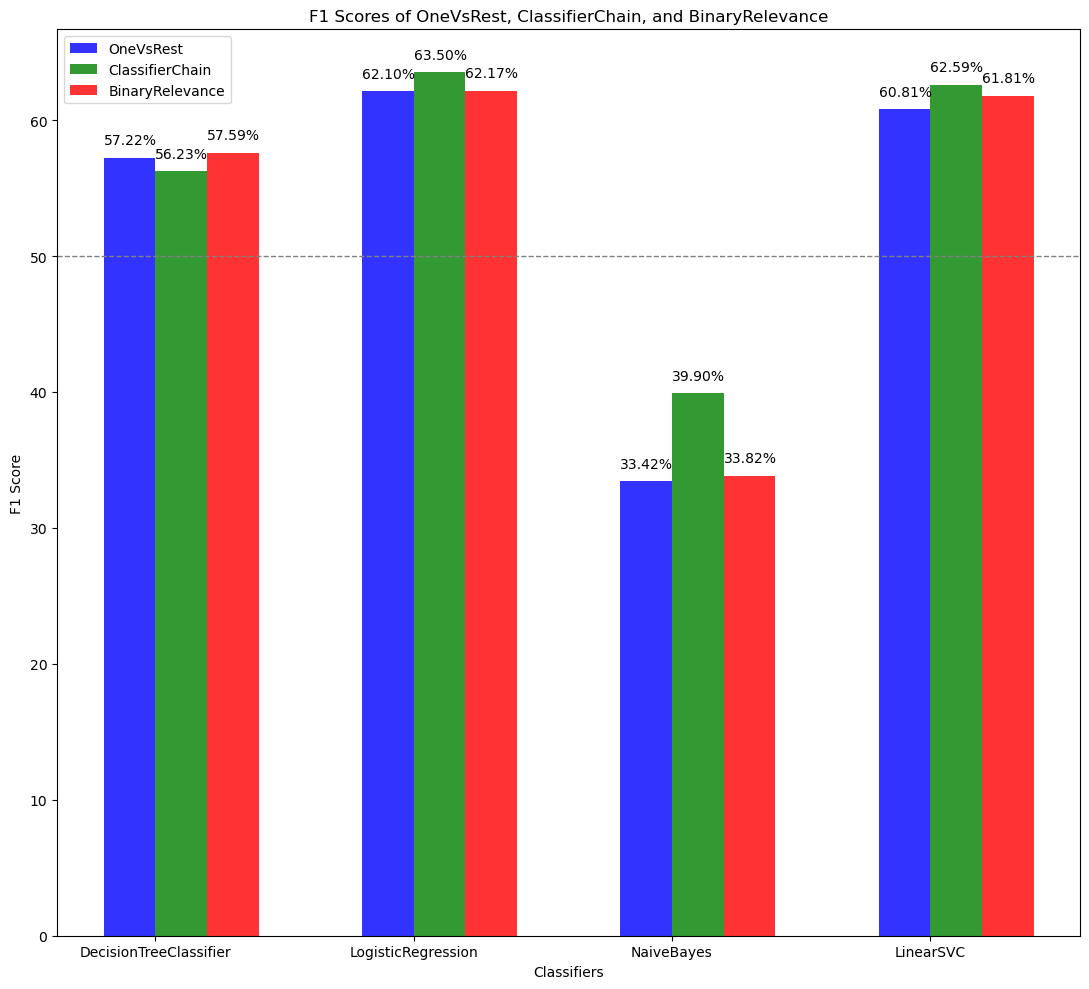

In [100]:
import numpy as np
import matplotlib.pyplot as plt

base_classifiers = ['DecisionTreeClassifier', 'LogisticRegression', 'NaiveBayes', 'LinearSVC']
classifiers = ['OneversusRest', 'ClassifierChain', 'BinaryRelevance']

ovr_hamming =[0.024821137327389366, 0.017385886702185497, 0.02477829727084919, 0.017381972382298577]
ovr_f1 = [0.5722301652487574, 0.6210295048785074, 0.3342071817810095, 0.6080526531362093]
cc_hamming = [0.02565380015222355,  0.01756398825704034, 0.026817223007502448, 0.017470044579754266]
cc_f1 = [0.5622795945447212, 0.6350078281904288, 0.39904434702295455, 0.6259460494080603]
br_hamming = [0.023821137327389366, 0.017375016853321736, 0.024731977818853973, 0.017311288382298577]
br_f1 = [0.5759301652487574, 0.6217156048369187, 0.3382282874856987, 0.6180526531362093]

bar_width = 0.2
opacity = 0.8


# Plot Hamming loss scores
plt.figure(figsize=(11, 8))
index = np.arange(len(base_classifiers))
plt.bar(index, ovr_hamming, bar_width, alpha=opacity, color='blue', label='OneVsRest')
plt.bar(index + bar_width, cc_hamming, bar_width, alpha=opacity, color='green', label='ClassifierChain')
plt.bar(index + 2*bar_width, br_hamming, bar_width, alpha=opacity, color='red', label='BinaryRelevance')
plt.xticks(index + bar_width / 2, base_classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Hamming Loss')
plt.title('Hamming Loss Scores of OneVsRest, ClassifierChain, and BinaryRelevance')
plt.legend()

# Add labels above each bar
for i, v in enumerate(ovr_hamming):
    plt.text(i - bar_width/2, v + 0.0005, "{:.4f}".format(v), color='black', fontsize=10)
for i, v in enumerate(cc_hamming):
    plt.text(i + bar_width/2, v + 0.0005, "{:.4f}".format(v), color='black', fontsize=10)
for i, v in enumerate(br_hamming):
    plt.text(i + 3*bar_width/2, v + 0.0005, "{:.4f}".format(v), color='black', fontsize=10)

plt.tight_layout()
plt.show()



# Plot F1 scores
plt.figure(figsize=(11, 10))
index = np.arange(len(base_classifiers))
plt.bar(index, [score * 100 for score in ovr_f1], bar_width, alpha=opacity, color='b', label='OneVsRest')
plt.bar(index + bar_width, [score * 100 for score in cc_f1], bar_width, alpha=opacity, color='g', label='ClassifierChain')
plt.bar(index + 2*bar_width, [score * 100 for score in br_f1], bar_width, alpha=opacity, color='r', label='BinaryRelevance')
plt.xticks(index + bar_width / 2, base_classifiers)
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.title('F1 Scores of OneVsRest, ClassifierChain, and BinaryRelevance')
plt.legend()

# Add labels above each bar
for i, v in enumerate(ovr_f1):
    plt.text(i - bar_width/2, v * 100 + 1, "{:.2f}%".format(v*100), color='black', fontsize=10)
for i, v in enumerate(cc_f1):
    plt.text(i + bar_width/2, v * 100 + 1, "{:.2f}%".format(v*100), color='black', fontsize=10)
for i, v in enumerate(br_f1):
    plt.text(i + 3*bar_width/2, v * 100 + 1, "{:.2f}%".format(v*100), color='black', fontsize=10)


# Add a horizontal line at y=50%
plt.axhline(y=50, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()



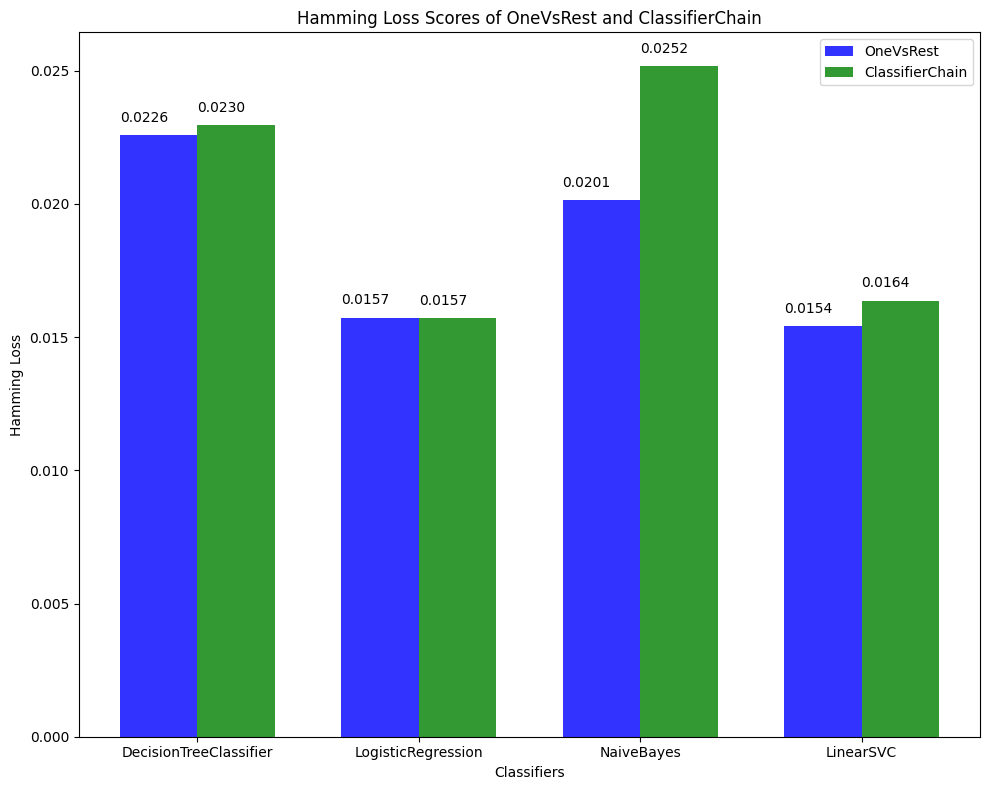

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_59213/2211079522.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


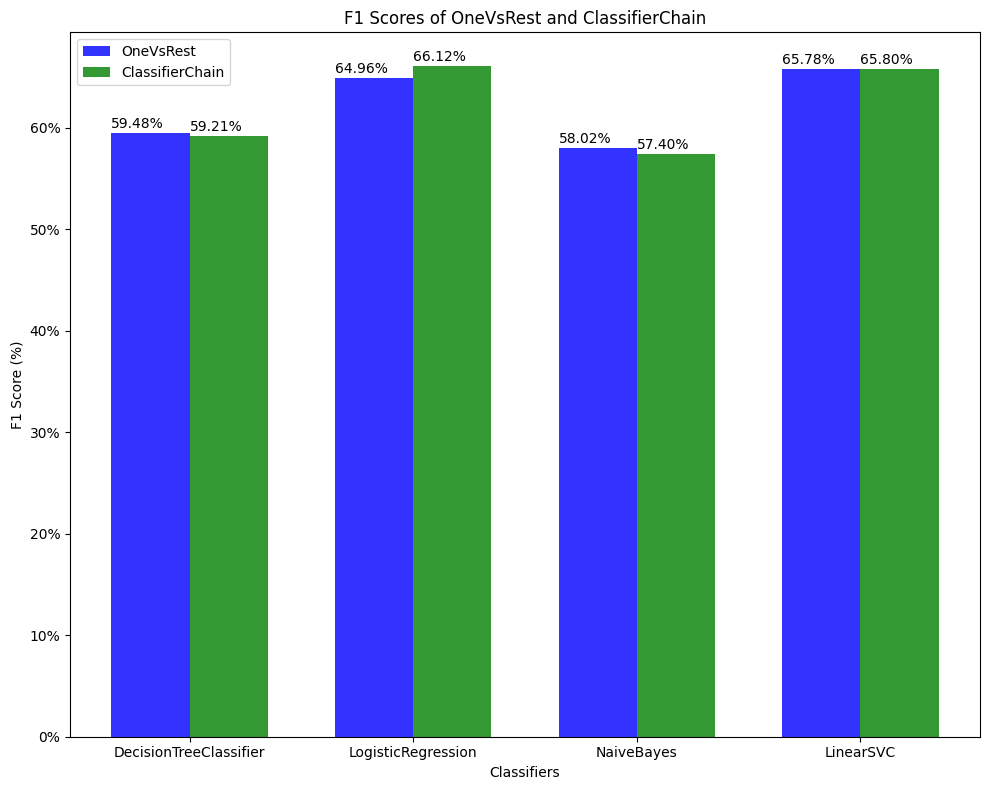

In [71]:
base_classifiers = ['DecisionTreeClassifier', 'LogisticRegression', 'NaiveBayes', 'LinearSVC']
classifiers = ['OneversusRest', 'ClassifierChain']
ovr_hamming = [0.022586036358675263, 0.01572973157338245, 0.020141205361710837, 0.015402298850574713]
ovr_f1 = [0.5947873432735022, 0.6495652847866418, 0.5801524911132278, 0.6577817178594272]
cc_hamming = [0.022951669565810566, 0.015724274361335652, 0.025184351444455813, 0.01637300044339848]
cc_f1 = [0.5920582352357796, 0.661166668340934, 0.574024475286693, 0.6579651323720949]

bar_width = 0.35
opacity = 0.8

# Plot Hamming loss scores
plt.figure(figsize=(10, 8))
index = np.arange(len(base_classifiers))
plt.bar(index, ovr_hamming, bar_width, alpha=opacity, color='b', label='OneVsRest')
plt.bar(index + bar_width, cc_hamming, bar_width, alpha=opacity, color='g', label='ClassifierChain')
plt.xticks(index + bar_width / 2, base_classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Hamming Loss')
plt.title('Hamming Loss Scores of OneVsRest and ClassifierChain')
plt.legend()

# Add labels above each bar
for i, v in enumerate(ovr_hamming):
    plt.text(i - bar_width/2, v + 0.0005, "{:.4f}".format(v), color='black', fontsize=10)
for i, v in enumerate(cc_hamming):
    plt.text(i + bar_width/2, v + 0.0005, "{:.4f}".format(v), color='black', fontsize=10)

plt.tight_layout()
plt.show()

# Plot F1 scores
plt.figure(figsize=(10, 8))
index = np.arange(len(base_classifiers))
plt.bar(index, [score * 100 for score in ovr_f1], bar_width, alpha=opacity, color='b', label='OneVsRest')
plt.bar(index + bar_width, [score * 100 for score in cc_f1], bar_width, alpha=opacity, color='g', label='ClassifierChain')
plt.xticks(index + bar_width / 2, base_classifiers)
plt.xlabel('Classifiers')
plt.ylabel('F1 Score (%)')
plt.title('F1 Scores of OneVsRest and ClassifierChain')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.legend()

# Add labels above each bar
for i, v in enumerate(ovr_f1):
    plt.text(i - bar_width/2, v*100 + 0.5, "{:.2f}%".format(v*100), color='black', fontsize=10)
for i, v in enumerate(cc_f1):
    plt.text(i + bar_width/2, v*100 + 0.5, "{:.2f}%".format(v*100), color='black', fontsize=10)

plt.tight_layout()
plt.show()


In [57]:
from skmultilearn.problem_transform import BinaryRelevance
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB(alpha=1)
svm = LinearSVC(random_state=42, max_iter=100000)

for classifier in [lr,nb, svm]:
    clf = BinaryRelevance(classifier, require_dense=[True, True])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  LogisticRegression
Hamming loss: 0.017385016853321736
F1-score: 0.6217156048369187
---
Clf:  MultinomialNB
Hamming loss: 0.02477829727084919
F1-score: 0.3342071817810095
---
Clf:  LinearSVC
Hamming loss: 0.017381972382298577
F1-score: 0.6080526531362093
---


In [58]:
from skmultilearn.problem_transform import BinaryRelevance
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB(alpha=0.001)
svm = LinearSVC(random_state=42, max_iter=100000)

for classifier in [nb]:
    clf = BinaryRelevance(classifier, require_dense=[True, True])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  MultinomialNB
Hamming loss: 0.024731977818853973
F1-score: 0.3382282874856987
---


In [75]:
from skmultilearn.problem_transform import BinaryRelevance
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB(alpha=0.001)
svm = LinearSVC(random_state=42, max_iter=100000)

for classifier in [dt]:
    clf = BinaryRelevance(classifier, require_dense=[True, True])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

KeyboardInterrupt: 

In [92]:
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'loss': ['hinge', 'modified_huber'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [0.0001, 0.001, 0.1],
#     'eta0':[0.0001, 0.001, 0.1]

# }
# # Create logistic regression object
# lr = SGDClassifier(random_state=42, max_iter=2000)
# # svc = OneVsRestClassifier(LinearSVC())
# # CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
# # CV_svc.fit(X_train, y_train)

# # Create OneVsRestClassifier object
# clf = OneVsRestClassifier(lr)

# # Create GridSearchCV object
# grid_lr = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=10)

# # Fit the GridSearchCV object to the data
# grid_lr.fit(X_train, y_train)

# # Print the best parameters and the corresponding score
# print("Best parameters: ", grid_lr.best_params_)
# print("Best score: ", grid_lr.best_score_)

#SGDC
# param_grid = {
#     'estimator__loss': ['hinge', 'modified_huber'],
#     'estimator__penalty': ['l2', 'l1', 'elasticnet'],
#     'estimator__alpha': [0.0001, 0.001, 0.1],
#     'estimator__eta0':[0.0001, 0.001, 0.1],
#     'n_jobs': [-1]
# }


param_grid = {
    # 'estimator__penalty': ['l2', 'l1', 'elasticnet'],
    'estimator__C': [1, 10],
    'n_jobs': [-1]
}
# Create logistic regression object
lr = LinearSVC(random_state=42, max_iter=10000)

# Create OneVsRestClassifier object
clf = OneVsRestClassifier(lr)

# Create GridSearchCV object
grid_lr = GridSearchCV(clf, param_grid, cv=5, verbose=10, scoring=make_scorer(hamming_loss))

# Fit the GridSearchCV object to the data
grid_lr.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_lr.best_params_)
print("Best score: ", grid_lr.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 1/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.016 total time=   7.3s
[CV 2/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 2/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.016 total time=   6.0s
[CV 3/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 3/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.016 total time=   6.0s
[CV 4/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 4/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.015 total time=   5.9s
[CV 5/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 5/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.016 total time=   6.2s
[CV 1/5; 2/2] START estimator__C=10, n_jobs=-1..................................
[CV 1/5; 2/2] END ...estimator__C=10, n_jobs=-1;,

In [ ]:
print("Y Pred", y_pred)
print("Y Train", y_test)


Y Pred [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Y Train [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [ ]:
# def display_confusion(c_matrix):
#     """
#     Displays the confusion matrix using matrix show
#     Args:
#         c_matrix: square confusion matrix, shape (num_classes, num_classes)
#     """
#     _, ax = plt.subplots()
#     ax.matshow(c_matrix, cmap=plt.cm.Blues)
#     for i in range(y_train.shape[0]):
#         for j in range(y_train.shape[0]):
#             ax.text(i, j, str(y_train[j, i]), va='center', ha='center')
    # plt.show()
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))

.net
[[27438   634]
 [ 1045   202]]
ajax
[[28957    75]
 [  151   136]]
android
[[26662   155]
 [  441  2061]]
angularjs
[[28776    62]
 [  151   330]]
arrays
[[28782   116]
 [  294   127]]
asp.net
[[28398   141]
 [  544   236]]
asp.net-mvc
[[28746    78]
 [  271   224]]
bash
[[28943   154]
 [   86   136]]
c
[[28131   261]
 [  506   421]]
c#
[[25053   620]
 [ 1825  1821]]
c++
[[26909   353]
 [  573  1484]]
css
[[27946   398]
 [  273   702]]
database
[[28880   150]
 [  220    69]]
django
[[28847    40]
 [   69   363]]
eclipse
[[28934    50]
 [  119   216]]
excel
[[29120    34]
 [   57   108]]
facebook
[[29112    38]
 [   48   121]]
forms
[[29132    57]
 [  110    20]]
git
[[28844    42]
 [   36   397]]
html
[[27676   488]
 [  722   433]]
html5
[[28926   112]
 [  191    90]]
ios
[[27382   549]
 [  632   756]]
iphone
[[28273   207]
 [  549   290]]
java
[[24996   803]
 [ 1288  2232]]
javascript
[[25587   808]
 [ 1361  1563]]
jquery
[[27275   388]
 [  554  1102]]
json
[[28837   108]
 [  147

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# # create a k-NN classifier object
# knn = KNeighborsClassifier(n_neighbors=3)
# clf = OneVsRestClassifier(knn)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print_score(y_pred, knn)